# The structure and properties of Neutron Stars
## Introduction
This notebook is part of the [Nuclear Astrophysics](https://master.us.es/fisicanuclear/index.php/cursos-2015-2017/astrofisica-nuclear-2) module of the [Inter-University Nuclear Physics Master's](https://master.us.es/fisicanuclear/index.php). The aim is to understand how to solve the stellar structure equations for neutron stars, with pressure provided by the equation of state of degenerate and interacting neutrons. You should read the [White Dwarf notebook](White_Dwarfs.ipynb) before attempting this one. An undergraduate introduction to neutron stars is available in [Silbar2004] (see Bibliography below).


We are interesting in solving the equations of hydrostatic equilibium for a spherical object. In the case of White Dwarves, the Newtonian equations can be safely used. The importance of General Relativistic effects is usually measured in terms of the compactness, 
$\mathcal{C} = \frac{2GM}{Rc^2} = 0.295 
\frac{M}{M_\odot}
\frac{10 \textrm{ km}}{R}$. For white dwarfs, the compactness is typically $\mathcal{C} \approx 10^{-3}$ and it is thus safe to use Newtonian equations. For neutron stars, in contrast, $\mathcal{C}$ can be as large as $0.5$ and a general relativistic formulation becomes necessary. The hydrostatic pressure and mass-energy conservation equations are the so-called Tolman-Oppenheimer-Volkov (TOV) equations and read:

\begin{align} 
\frac{dP(r)}{dr}& = - \frac{G m_<(r) \rho(r)}{r^2} 
\frac{ \left( 1 + \frac{P(r)}{\rho(r) c^2} \right) 
\left( 1 + \frac{4 \pi P(r) r^3}{m(r)_< c^2} \right) }{
1 - \frac{2 G m_<(r)}{r c^2} }
\, , \label{eq:pressure} \tag{1} \\ 
\frac{dm_<(r)}{dr}& = 4 \pi r^2 \rho(r) \, . \label{eq:mass}  \tag{2} 
\end{align} 

The variables in this equation are exactly the same as in the [White Dwarf case](White_Dwarfs.ipynb).

## Physical considerations 
For a degenerate star, the two equations above are supplemented by an equation of state relating the pressure to the mass density, $P \equiv P(\rho)$. Here, one could use a free neutron gas equation of state. This would be exactly the same as in the [White Dwarf case](White_Dwarfs.ipynb), but with the replacements $m_e \to m_n$ and $Y_e=1$. Alternatively, one could use a tabulated equation of state including effects like the interaction between neutrons or the changing composition inside of the star due to $\beta-$equilibrium. This code can handle both options.  

## Dimensionless reduction
The procedure to get a dimensionless version of the equations follows the exact same steps as in the [White Dwarf case](White_Dwarfs.ipynb). Our choice of dimensionless variables is such that the additional GR factors in the hydrostatic equilibrium equation are all accompanied by factors which are exactly equal to $1$. In other words, 
$\frac{P_0}{\rho_c c^2} = \frac{2 G M_0}{R_0 c^2} =1$,and the dimensionless TOV equations become:
\begin{align} 
\frac{d \bar P( \bar r)}{d \bar r}& = 
- \frac{\bar  m_<(\bar r) \bar \rho(\bar r)}{\bar r^2} 
\frac{ \left( 1 + \frac{\bar P(\bar r)}{\bar \rho(\bar r) c^2} \right) 
\left( 1 + \frac{4 \pi \bar P(\bar r) \bar r^3}{\bar m(\bar r)_< c^2} \right) }{
1 - \frac{2 G \bar m_<(\bar r)}{\bar r c^2} }
\, , \\
\frac{d \bar m_<(\bar r)}{d\bar r}& = 4 \pi \bar r^2 \bar \rho(\bar r) \, . \tag{2} 
\end{align} 
Considering the replacements $m_e \to m_n$ and $Y_e=1$, we find the following typical scales for this problem:

\begin{align} 
\rho_0 & =\frac{n_0 m_n}{Y_e} \approx 
6.1 \times 10^{18} \textrm{ kg m}^{-3} \, , \\
P_0& =\frac{ \mathcal{E}_0 }{3 \pi^2} = 
\frac{ (m_n c^2)^4 }{( \hbar c)^3 3 \pi^2}  
\approx 
5.47 \times 10^{35} \textrm{ Pa} \, , \\
R_0 &= \frac{ \sqrt{3 \pi}}{2 \alpha_G^{1/2}} \left( \frac{\hbar}{m_e c} \right) \approx 4.2 \, \textrm{ km} \, , \\
M_0 &= \frac{ \sqrt{3 \pi}}{ 2\alpha_G^{3/2}}  m_n Y_e^2 \approx 2.84  M_\odot  \, .
\end{align}

## The code
The python code `neutron_stars.py` provides a solution to the TOV equations and follows the same structure as `neutron_stars.py`. The code starts by importing the necessary libraries to perform numerical analysis (numpy) and plotting (matplotlib).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is followed by a call to import the numerical values of the relevant physical constants from the `physical_constants.py` file and to the equation of state functions (in case one wants to solve the Fermi gas neutron star).

In [2]:
from physical_constants import *
# IMPORT EQUATION-OF-STATE FUNCTIONS
from eos_functions import *

Next, we define the central densities, $\rho_c$. Just like in the [White Dwarf case](White_Dwarfs.ipynb), we choose a single central density as an initial example. 

In [3]:
# NUMBER OF CENTRAL DENSITIES (AND HENCE OF MASSES & RADII)
number_central_density=1
# RANGE OF CENTRAL DENSITIES - 0.35 to 0.75 WORKS WELL
central_density_i=0.55
central_density_f=0.55
# DENSITIES DISTRIBUTED IN LOGARITHMIC STENCIL
#xfc_range=np.power(10,np.linspace(np.log10(central_density_i),np.log10(central_density_f),number_central_density))
xfc_range=np.linspace(central_density_i,central_density_f,number_central_density)

We now define the typical scales for mass, radius, mass density and pressure.

In [4]:
# MASS UNITS
M0_noYe=np.sqrt(3.*pi)/2./np.power(alphaG,1.5)*mnuc_kg/Msun
mass_units=M0_noYe # unit mass M_0 in solar masses for y_e
# RADIUS UNITS
R0_noYe=np.sqrt(3.*pi)/2./np.power(alphaG,0.5)*(hbar/mnuc_kg/c)/1e3
radial_units=R0_noYe   # unit length R_0 in Km for y_e
# DENSITY UNITS
rho_noYe=np.power(mnuc_kg*c/hbar,3)*mnuc_kg/(3.*np.power(pi,2))
# PRESSURE UNITS
press_units=np.power(mnuc_kg*c,4)/np.power(hbar,3)*c/3./np.power(pi,2)

print('Typical Units for Neutron Stars')
txt='# M0={:.5f} [M_sun]'
print(txt.format(mass_units))
txt='# R0={:.2f} [km]'
print(txt.format(radial_units))
txt='# rho0={:.4E}*xF^3 [kg m-3]'
print(txt.format(rho_noYe))
txt='# P0={:.4E} [Pa]'
print(txt.format(press_units))

Typical Units for Neutron Stars
# M0=2.84018 [M_sun]
# R0=4.19 [km]
# rho0=6.0894E+18*xF^3 [kg m-3]
# P0=5.4729E+35 [Pa]


If a tabulated equation-of-state is used, one should read the corresponding tables before solving the differential equations. This is done in the following step by reading two separate files. The first, `NS_EOS/crust.dat`, includes the equation of state of the neutron-star curst with $2573$ points. The second one, `NS_EOS/EOS_npe_HHparam.dat`, contains $100$ values for the equation of state in the star's core. The following step reads the pressure, energy density and number density for the crust and core; concatenates them; and reduces all quantities to dimensionless variables. It is important to note that most EoS tabulate the mass-energy density, $\epsilon=\rho c^2$, rather than the mass density, $\rho$.

In [5]:
# ... FIXED NUMBER OF CRUST AND CORE POINTS
# ... Read files of density, energy density and presure (crust and core)
ncrust=2573    # points to consider from the crust file
file_crust="./NS_EOS/crust.dat"
# ... READ CRUST FILE
eden_crust, pres_crust,den_crust = np.loadtxt(file_crust,usecols=(0,1,2)).T

ncore=100      # points to consider from the core file
file_core="./NS_EOS/EOS_npe_HHparam.dat"
eden_core, pres_core,den_core = np.loadtxt(file_core,usecols=(0,1,2)).T

# CONCATENATE ARRAYS
nf=ncrust+ncore
eden=np.concatenate((eden_crust,eden_core))
pres=np.concatenate((pres_crust,pres_core))
numden=np.concatenate((den_crust,den_core))

# TRANSFORM TO DIMENSIONLESS UNITS
# Energy density and pressure from MeVfm-3 to dimensionless
conv1=np.power(mneut,4)/hbc3/3./np.power(pi,2)
eden=eden/conv1
pres=pres/conv1

# Number density in units of rho0
numden=numden

densmax=np.amax( eden )

The dimensionless TOV equations are solved using the same Euler method as for the [White Dwarf case](White_Dwarfs.ipynb). Here, the equation of state is used in the right-hand-side of Eq. (A). The inversion $\rho=\rho[P]$ is performed by interpolation.

In [6]:
##########################################################################
# STEP SIZE OF INTEGRATION IN RADIAL COORDINATE
step_size=1e-4
# MAXIMUM NUMBER OF STEPS IN INTEGRATION
iradial_max=int(1000./step_size)

# INITIALIZE MASS AND RADIUS ARRAYS
NS_mass=np.zeros(number_central_density)
NS_radius=np.zeros(number_central_density)

# FOR EACH RHO_C, THIS STORES THE NUMBER OF POINTS IN RADIAL COORDINATE
number_coord=np.zeros( number_central_density,dtype=int )
# THIS STORES THE VALUE OF r, m_< & p FOR ALL RHO_C AND RADIAL COORDINATES
radial_coord=np.zeros( (number_central_density,iradial_max) )
mass_profile=np.zeros( (number_central_density,iradial_max) )
pres_profile=np.zeros( (number_central_density,iradial_max) )
numden_profile=np.zeros( (number_central_density,iradial_max) )

# FORMATS FOR OUTPUT
fmt_MR='# M={:6.3f} [M_sun] # R={:8.2f} [km]'

# LOOP OVER CENTRAL DENSITY
for irhoc, xfc in enumerate(xfc_range) :

    # Numerical trick to provide a similar number of steps for all masses
    stepr=step_size/xfc#**(0.75)

    # Solve differential equations with Euler method
    # Initial conditions
    mass_old=0.
    dens_old=np.power(xfc,3)
    press_old=np.interp(dens_old,eden,pres)
    numden_old=np.interp(dens_old,eden,numden)    
    r_old=stepr

    if( dens_old >= densmax) :
        print('Maximum density is too high - decrease')
        print('Current density')
        print(dens_old)
        exit()

    for iradial in range(0,iradial_max):

# STORE IN ARRAY
        radial_coord[ irhoc,iradial ]=r_old*radial_units # IN METERS
        mass_profile[ irhoc,iradial ]=mass_old*mass_units # IN SOLAR MASSES
        pres_profile[ irhoc,iradial ]=press_old*press_units # IN
        numden_profile[ irhoc,iradial ]=numden_old

# EULER STEP FORWARD
        dm=np.power(r_old,2)*dens_old*stepr

        if( mass_old == 0) :
            dp=0.
        else:
            dp=-mass_old*dens_old/np.power(r_old,2)*stepr
            dp=dp*(1.+press_old/dens_old)
            dp=dp*(1.+press_old*np.power(r_old,3) / mass_old)
            dp=dp/(1.-2.*mass_old/r_old)

# NEW DATA IN EULER
        press_new=press_old+dp
        if press_new < 0. : break
        mass_new=mass_old+dm
        r_new=r_old+stepr

        # USE FOR FFG
        #dens_old=invert_eos(press_new)
        
        dens_old=np.interp(press_new,pres,eden)
        numden_old=np.interp(press_new,pres,numden)

        r_old=r_new
        mass_old=mass_new
        press_old=press_new
    else:
        print("Too many iterations")
        exit()
    # EXITING LOOP OVER RADIAL COORDINATES

    if( iradial < 100 ) :
        print(("Small number of iterations niter=",iradial))

    # FOR EACH CENTRAL DENSITY irhoc, STORE THE NUMBER OF RADIAL COORDINATES; THE RADIUS AND MASS OF THE STAR
    number_coord[ irhoc ] = int(iradial)
    NS_radius[ irhoc ] = r_old*radial_units
    NS_mass[ irhoc ] = mass_old*mass_units

    print(fmt_MR.format(NS_mass[irhoc],NS_radius[irhoc]))
    # END LOOP OVER CENTRAL DENSITY

# M= 1.463 [M_sun] # R=   11.87 [km]


Having computed one neutron-star profile, we can now plot the results for the enclosed mass; the number density and the pressure as a function of radial variable. These give us an indication of the interior properties of the star.

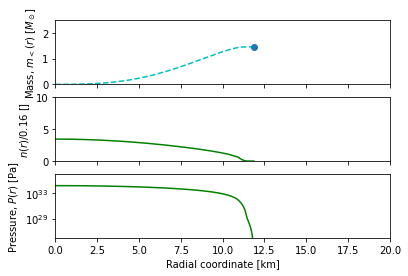

In [7]:
# PLOT A MASS-RADIUS DIAGRAM, INCLUDING THE STAR'S PRESSURE AND NUMBER DENSITY PROFILE AS A FUNCTION OF r
fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
for iplot in range(0,number_central_density) :
    ax1.plot(radial_coord[iplot,1:number_coord[iplot]], mass_profile[iplot,1:number_coord[iplot]],'c--',)
    ax2.plot(radial_coord[iplot,1:number_coord[iplot]], numden_profile[iplot,1:number_coord[iplot]],'g-',)
    ax3.semilogy(radial_coord[iplot,1:number_coord[iplot]], pres_profile[iplot,1:number_coord[iplot]],'g-',)

ax1.plot( NS_radius,NS_mass,'o-')

ax1.set(ylabel='Mass, $m_<(r)$ [$M_\odot$]')
ax1.set_ylim([0,2.5])
ax2.set(ylabel='$n(r)/0.16$ []')
ax2.set_ylim([0,10])
ax3.set(ylabel='Pressure, $P(r)$ [Pa]')
ax3.set_ylim([1e26,1e36])

ax3.set(xlabel='Radial coordinate [km]')
ax3.set_xlim([0,20])

plt.show()

# WRITING OUTPUT IN MR.dat FILE
#data_to_write = np.array( [NS_mass[:],NS_radius[:]] ).T
#outputfile="MR.dat"
#with open(outputfile,"w+") as file_id :
#    np.savetxt(file_id,data_to_write,fmt=["%16.6E","%16.6E"],header="  Radius [km]   Mass [M_sun]")

# BIBLIOGRAPHY
<a id='Silbar2003'></a> [Silbar2004] S. Silbar & S. Reddy, [American Journal of Physics 72, 892 (2004)](https://doi.org/10.1119/1.1703544); [nucl-th/0309041
](https://arxiv.org/abs/nucl-th/0309041).

<a id='Shapiro'></a> [Shapiro] Stuart L. Shapiro & Saul A. Teukolsky, 
*Black Holes, White Dwarfs, and Neutron Stars: The Physics of Compact Objects* (1983), ISBN 9780471873167;
[doi:10.1002/9783527617661](https://doi.org/doi:10.1002/9783527617661).

<a id='Haensel'></a> [Haensel] P. Haensel, A. Y. Potekhin & D. G. Yakovlev,
*Neutron Stars 1: Equation of State and Structure*
(2003),
ISBN 978-0-387-33543-8,
[doi:10.1007/978-0-387-47301-7](https://doi.org/10.1007/978-0-387-47301-7).